## Assignment 1 - Reinforcement Learning Programming- CSCN8020
#### Name- Kumari Nikitha Singh
#### Student ID- 9053016

---

### Problem 1. Pick-and-Place Robot: Consider using reinforcement learning to control the motion of a robot arm

#### Designing an MDP 

#### 1. Introduction  
Reinforcement Learning (RL) is an effective framework for teaching robots to perform tasks that require adaptability, precision, and smooth motion.  
A **pick-and-place robot arm** is a classic use case where the robot must learn to reach, grasp, and place objects efficiently.  

We model this problem as a **Markov Decision Process (MDP)**, which allows the learning agent to reason about states, actions, rewards, and transitions over time.  

---

#### 2. MDP Definition  
An MDP is defined as:  

\[
\text{MDP} = (S, A, P, R, \gamma)
\]  

- **S (States):** Information about the robot, object, and environment.  
- **A (Actions):** Control signals the agent can apply.  
- **P (Transition function):** Dynamics describing how the robot moves between states.  
- **R (Reward function):** Feedback for achieving goals or penalizing inefficiency.  
- **γ (Discount factor):** Trade-off between immediate and future rewards.  

---

#### 3. States (S)  
The **state space** must include all necessary information to describe the system at a given time.  

#### Components of the state:
1. **Robot arm configuration**  
   - Joint angles: \(\theta_1, \theta_2, ..., \theta_n\)  
   - Joint angular velocities: \(\omega_1, \omega_2, ..., \omega_n\)  
    This ensures the agent knows both the position and speed of each motor.  

2. **End-effector (gripper) position**  
   - Cartesian coordinates: \((x_{ee}, y_{ee}, z_{ee})\)  
    Allows the agent to understand where the hand is in space relative to the object and target.  

3. **Object status**  
   - Location of the object: \((x_{obj}, y_{obj}, z_{obj})\)  
   - Binary grasp indicator: `grasp = 0` (not held), `grasp = 1` (held).  

4. **Target position**  
   - Desired placement location: \((x_{target}, y_{target}, z_{target})\)  

#### Example state vector:  
\[
s = [\theta_1, \theta_2, \theta_3, \omega_1, \omega_2, \omega_3, x_{ee}, y_{ee}, z_{ee}, x_{obj}, y_{obj}, z_{obj}, \text{grasp}, x_{target}, y_{target}, z_{target}]
\]  

 **Reasoning:**  
- This state captures everything the robot needs: how it is positioned, whether it holds the object, and where the target is.  
- Without joint velocities, the robot might produce jerky, unsafe motions.  

---

#### 4. Actions (A)  
The **action space** defines how the agent influences the robot.  

#### Possible choices:  
1. **Continuous joint control (preferred in robotics):**  
   - Apply torque values to each motor:  
     \[
     a = [\tau_1, \tau_2, ..., \tau_n]
     \]  

2. **Position increments (discretized):**  
   - Small changes in joint angle (e.g., rotate elbow by ±1°).  

3. **Gripper control:**  
   - Discrete: `open` / `close`.  

 **Final action design (hybrid):**  
- Continuous: joint torques or incremental motions.  
- Discrete: gripper open/close.  

**Reasoning:**  
- Continuous actions allow smooth and natural trajectories.  
- Gripper requires only a simple binary action.  

---

#### 5. Rewards (R)  
The **reward function** drives the behavior we want: fast, smooth, and successful execution.  

#### Reward shaping:  
1. **Task completion:**  
   - +100 for successfully placing the object at the target.  

2. **Successful grasp:**  
   - +20 when the gripper closes on the object.  

3. **Motion efficiency:**  
   - −(Σ |τi|²) penalty for excessive torque (smoothness).  
   - −0.1 per time step (encourages faster execution).  

4. **Failure cases:**  
   - −50 if the object is dropped mid-way.  
   - −100 for collisions with the table, walls, or robot base.  

 **Reasoning:**  
- Large positive reward for success ensures task focus.  
- Intermediate rewards help guide exploration.  
- Penalties prevent unsafe, jerky, or unnecessarily slow actions.  

---

#### 6. Transition Function (P)  
- Transitions are governed by robot **physics**:  
  - Next joint positions and velocities are determined by dynamics equations under applied torques.  
  - If the gripper closes and the object is within grasp range, the object state changes (`grasp = 1`).  
- In **simulation** (PyBullet, MuJoCo), this is deterministic.  
- In the **real world**, there may be stochastic effects (sensor noise, friction variations).  

---

#### 7. Discount Factor (γ)  
- We choose **γ = 0.95 – 0.99**.  
- A high discount encourages long-term planning, so the agent values smooth placement over short-term gains.  

 Example:  
- If γ = 0.99, future success (placing object) is highly valuable.  
- If γ = 0.5, the agent might just move quickly and ignore smoothness.  

---

#### 8. Example MDP Table  

| Component       | Design                                                                 | Reasoning                                                       |
|-----------------|------------------------------------------------------------------------|-----------------------------------------------------------------|
| **States (S)**  | Joint angles & velocities, end-effector position, object position, grasp status, target location | Captures robot dynamics, task progress, and environment         |
| **Actions (A)** | Continuous torques + discrete gripper open/close                       | Enables smooth, natural movements with simple grasp control      |
| **Rewards (R)** | +100 success, +20 grasp, − torque² penalty, − time penalty, −100 collision | Encourages fast, safe, smooth, successful execution             |
| **Transitions (P)** | Physics-based (deterministic in simulation, noisy in real-world)   | Reflects robot dynamics                                         |
| **Discount (γ)** | 0.95–0.99                                                             | Balances immediate efficiency with long-term success            |

---

In addition to defining the states, actions, and rewards, we also need to describe how the robot moves between states and why this setting is a valid MDP.

#### Transition Dynamics (P)
The next state \(s'\) is determined by the applied motor command (action) and the robot’s physical dynamics.  
- If an action is applied, the robot’s joint positions and velocities update deterministically according to physics.  
- In practice, small stochastic variations (e.g., slippage, sensor noise) may occur, so transitions can be modeled as mostly deterministic with some randomness.

#### MDP Justification
This problem can be modeled as an MDP because the **next state** and **reward** depend only on the **current state and action**, not on the full history of states.
 

#### Conclusion  
By defining the MDP in this way:  
- The **state** contains all relevant robot and environment variables.  
- The **action** space enables precise motor control and object manipulation.  
- The **reward** function balances **speed, smoothness, and safety**.  
- With this formulation, a reinforcement learning agent can gradually learn an **optimal policy** for repetitive pick-and-place tasks, achieving human-like smoothness and efficiency.  

---


### Problem 2: Value Iteration in a 2×2 Gridworld

#### Problem statement  
We are given a **2×2 gridworld** with states:  
\[
S = \{s_1, s_2, s_3, s_4\}
\]  

- **Action space:** \(A = \{\text{up, down, left, right}\}\)  
- **Transition dynamics:**  
  - If the action is valid (not running into a wall), the transition is deterministic.  
  - If the action is invalid, the agent remains in the same state.  
- **Rewards:**  
  - \(R(s_1) = 5\) for all actions  
  - \(R(s_2) = 10\) for all actions  
  - \(R(s_3) = 1\) for all actions  
  - \(R(s_4) = 2\) for all actions  
- **Policy:** initial policy always chooses **“up”**.  

We must perform **two iterations of Value Iteration (without code)**, showing step-by-step updates of the value function.

---

#### Value Iteration  

The update rule for Value Iteration is:  

\[
V_{k+1}(s) = \max_{a \in A} \Big[ R(s) + \gamma \sum_{s'} P(s'|s,a)V_k(s') \Big]
\]  

where:  
- \(V_k(s)\) = value of state \(s\) at iteration \(k\)  
- \(\gamma\) = discount factor (assume \(\gamma = 1\) if not specified)  
- Transition is deterministic: the agent moves to a single next state \(s'\).  

---

#### Iteration 0: Initialization  
We start with:  
\[
V_0(s_1) = V_0(s_2) = V_0(s_3) = V_0(s_4) = 0
\]  

---

#### Iteration 1  

#### Step 1: Updated values for each state

- **For \(s_1\):**  
  - Possible next states:  
    - Up → wall → stay in \(s_1\)  
    - Left → wall → stay in \(s_1\)  
    - Right → \(s_2\)  
    - Down → \(s_3\)  
  - Compute:  
    \[
    V_1(s_1) = \max\{5 + V_0(s_1),\; 5 + V_0(s_2),\; 5 + V_0(s_3)\}
    \]  
    \[
    = \max\{5+0,\; 5+0,\; 5+0\} = 5
    \]  

- **For \(s_2\):**  
  - Next states: Up (stay in \(s_2\)), Right (stay in \(s_2\)), Left (\(s_1\)), Down (\(s_4\))  
  - Compute:  
    \[
    V_1(s_2) = \max\{10 + V_0(s_2),\; 10 + V_0(s_1),\; 10 + V_0(s_4)\}
    \]  
    \[
    = \max\{10+0,\; 10+0,\; 10+0\} = 10
    \]  

- **For \(s_3\):**  
  - Next states: Left (stay in \(s_3\)), Down (stay in \(s_3\)), Up (\(s_1\)), Right (\(s_4\))  
  - Compute:  
    \[
    V_1(s_3) = \max\{1 + V_0(s_3),\; 1 + V_0(s_1),\; 1 + V_0(s_4)\}
    \]  
    \[
    = \max\{1+0,\; 1+0,\; 1+0\} = 1
    \]  

- **For \(s_4\):**  
  - Next states: Right (stay in \(s_4\)), Down (stay in \(s_4\)), Up (\(s_2\)), Left (\(s_3\))  
  - Compute:  
    \[
    V_1(s_4) = \max\{2 + V_0(s_4),\; 2 + V_0(s_2),\; 2 + V_0(s_3)\}
    \]  
    \[
    = \max\{2+0,\; 2+0,\; 2+0\} = 2
    \]  

####  Updated values after Iteration 1:  
\[
V_1(s_1) = 5,\; V_1(s_2) = 10,\; V_1(s_3) = 1,\; V_1(s_4) = 2
\]  

---

#### Iteration 2  

- **For \(s_1\):**  
  - Transitions: stay in \(s_1\), go to \(s_2\), go to \(s_3\).  
  - Compute:  
    \[
    V_2(s_1) = \max\{5 + V_1(s_1),\; 5 + V_1(s_2),\; 5 + V_1(s_3)\}
    \]  
    \[
    = \max\{5+5,\; 5+10,\; 5+1\} = \max\{10, 15, 6\} = 15
    \]  

- **For \(s_2\):**  
  - Transitions: stay in \(s_2\), go to \(s_1\), go to \(s_4\).  
  - Compute:  
    \[
    V_2(s_2) = \max\{10 + V_1(s_2),\; 10 + V_1(s_1),\; 10 + V_1(s_4)\}
    \]  
    \[
    = \max\{10+10,\; 10+5,\; 10+2\} = \max\{20, 15, 12\} = 20
    \]  

- **For \(s_3\):**  
  - Transitions: stay in \(s_3\), go to \(s_1\), go to \(s_4\).  
  - Compute:  
    \[
    V_2(s_3) = \max\{1 + V_1(s_3),\; 1 + V_1(s_1),\; 1 + V_1(s_4)\}
    \]  
    \[
    = \max\{1+1,\; 1+5,\; 1+2\} = \max\{2, 6, 3\} = 6
    \]  

- **For \(s_4\):**  
  - Transitions: stay in \(s_4\), go to \(s_2\), go to \(s_3\).  
  - Compute:  
    \[
    V_2(s_4) = \max\{2 + V_1(s_4),\; 2 + V_1(s_2),\; 2 + V_1(s_3)\}
    \]  
    \[
    = \max\{2+2,\; 2+10,\; 2+1\} = \max\{4, 12, 3\} = 12
    \]  

#### Updated values after Iteration 2:  
\[
V_2(s_1) = 15,\; V_2(s_2) = 20,\; V_2(s_3) = 6,\; V_2(s_4) = 12
\]  

---

#### Value Function Updates (Side-by-Side)

| State | Iteration 1 \(V_1\) | Iteration 2 \(V_2\) |
|-------|---------------------|---------------------|
| s1    | 5                   | 15                  |
| s2    | 10                  | 20                  |
| s3    | 1                   | 6                   |
| s4    | 2                   | 12                  |

---

#### Step-by-Step Explanation of Updates
- **Iteration 1:** Each state’s value equals its immediate reward since all future values were initialized to 0.  
- **Iteration 2:** Rewards from the best reachable next state are propagated back.  
  - \(V(s_1)\) increases from 5 → 15 because it connects to \(s_2\), which has higher reward.  
  - \(V(s_2)\) grows from 10 → 20 since it reinforces its own high reward.  
  - \(V(s_3)\) increases from 1 → 6 as it can reach better states.  
  - \(V(s_4)\) increases from 2 → 12 since it can also transition toward \(s_2\).

---

#### Summary
- **Iteration 1 Values:** \(\{s_1: 5,\; s_2: 10,\; s_3: 1,\; s_4: 2\}\)  
- **Iteration 2 Values:** \(\{s_1: 15,\; s_2: 20,\; s_3: 6,\; s_4: 12\}\)  

Thus, the optimal policy will strongly prefer moving toward **\(s_2\)**, as it provides the highest long-term reward.



In [1]:
import numpy as np

# ----------------------------
# Gridworld Setup
# ----------------------------
states = ["s1", "s2", "s3", "s4"]

# Rewards for each state
R = {
    "s1": 5,
    "s2": 10,
    "s3": 1,
    "s4": 2
}

# Transition map (deterministic)
# Each action leads to a next state unless blocked by a wall
transitions = {
    "s1": {"up": "s1", "left": "s1", "right": "s2", "down": "s3"},
    "s2": {"up": "s2", "right": "s2", "left": "s1", "down": "s4"},
    "s3": {"left": "s3", "down": "s3", "up": "s1", "right": "s4"},
    "s4": {"right": "s4", "down": "s4", "up": "s2", "left": "s3"}
}

actions = ["up", "down", "left", "right"]
gamma = 1.0   # Discount factor

# ----------------------------
# Value Iteration Function
# ----------------------------
def value_iteration(num_iterations=2):
    V = {s: 0 for s in states}   # Initial values = 0
    history = []

    for it in range(num_iterations):
        new_V = {}
        for s in states:
            values = []
            for a in actions:
                s_next = transitions[s][a]
                reward = R[s]
                values.append(reward + gamma * V[s_next])
            new_V[s] = max(values)
        V = new_V
        history.append(V.copy())
    return history

# Run 2 iterations
history = value_iteration(2)

# Display results
for i, V in enumerate(history, 1):
    print(f"Iteration {i}: {V}")


Iteration 1: {'s1': 5.0, 's2': 10.0, 's3': 1.0, 's4': 2.0}
Iteration 2: {'s1': 15.0, 's2': 20.0, 's3': 6.0, 's4': 12.0}


#### Visualization of the Value Function

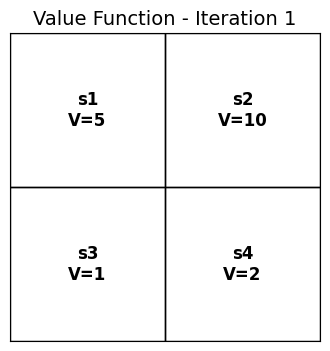

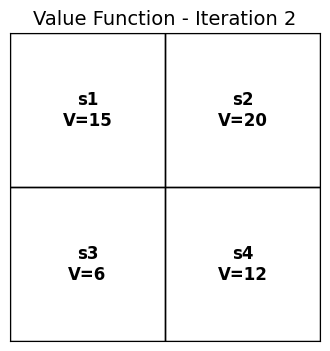

In [2]:
import matplotlib.pyplot as plt

# Define grid layout for visualization (2x2)
grid_positions = {
    "s1": (0, 1),  # top-left
    "s2": (1, 1),  # top-right
    "s3": (0, 0),  # bottom-left
    "s4": (1, 0)   # bottom-right
}

# History from manual code (for 2 iterations)
history = [
    {"s1": 5, "s2": 10, "s3": 1, "s4": 2},   # Iteration 1
    {"s1": 15, "s2": 20, "s3": 6, "s4": 12}  # Iteration 2
]

def plot_grid_values(values, iteration):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Value Function - Iteration {iteration}", fontsize=14)

    for state, (x, y) in grid_positions.items():
        ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, fill=False, edgecolor="black"))
        ax.text(x, y, f"{state}\nV={values[state]}", ha="center", va="center", fontsize=12, weight="bold")

    plt.show()

# Plot Iteration 1 and 2 values
for i, vals in enumerate(history, start=1):
    plot_grid_values(vals, i)


### Interpretation 

The two diagrams show how the "value" of each state changes as the agent learns in the 2×2 Gridworld.


#### Iteration 1
At the very start, the agent only knows about the **immediate rewards**.  
- State \(s_1\) is worth 5,  
- State \(s_2\) is worth 10,  
- State \(s_3\) is worth 1,  
- State \(s_4\) is worth 2.  

Here, the agent isn’t thinking ahead yet — it only sees what it gets right away for being in each state.

---

#### Iteration 2
Now the agent starts to **look ahead**.  
- From \(s_1\), it realizes it can move to \(s_2\) (which is very rewarding).  
  So the value of \(s_1\) jumps from 5 → 15.  
- From \(s_2\), staying there is already great, so its value doubles to 20.  
- \(s_3\) and \(s_4\) also go up because they are connected to better states.  

This shows that states close to \(s_2\) (the best state) become more valuable because the agent knows it can reach that reward in the future.

---

#### Key Insight
What we see here is **reward propagation**:
- High-reward states (like \(s_2\)) spread their influence to neighboring states.  
- Even states with small immediate rewards (like \(s_1\) and \(s_3\)) become more valuable because they can lead to bigger payoffs later.

The visualization makes it clear:  
- At first, values are just the raw rewards.  
- Then, with each iteration, states “learn” the benefits of moving toward better neighbors.  
- Over time, the values will stabilize, and the agent will know the best long-term strategy.  

  * states with access to higher long-term rewards become more valuable, even if their immediate reward is small.*

###  Policy Improvement 

After each iteration, you should also indicate which action is the best in each state (i.e., the greedy policy derived from the updated values).

#### Iteration 1-  Values after Iteration 1:
- V(s1) = 5  
- V(s2) = 10  
- V(s3) = 1  
- V(s4) = 2  

####  Action in Each State:
- **s1** → Right to s2 (since V(s2)=10 is highest)  
- **s2** → Stay in s2 (Up/Right keeps it in place, highest value)  
- **s3** → Up to s1 (V(s1)=5 is better than s3=1 or s4=2)  
- **s4** → Up to s2 (V(s2)=10 is best)  

| State | Best Action π(s) |
|-------|------------------|
| s1    | Right            |
| s2    | Up or Right (stay in s2) |
| s3    | Up               |
| s4    | Up               |

---

#### Iteration 2- Values after Iteration 2:
- V(s1) = 15  
- V(s2) = 20  
- V(s3) = 6  
- V(s4) = 12  

#### Best Action in Each State:
- **s1** → Right to s2 (20 is best option)  
- **s2** → Stay in s2 (highest self-value 20)  
- **s3** → Up to s1 (15 is better than s4=12)  
- **s4** → Up to s2 (20 is highest)  

| State | Best Action π(s) |
|-------|------------------|
| s1    | Right            |
| s2    | Up or Right (stay in s2) |
| s3    | Up               |
| s4    | Up               |

---

#### Interpretation
- After just two iterations, the **policy stabilizes**:  
  - The agent always tries to reach **s2** because it has the highest long-term value.  
  - States connected to s2 (s1, s3, s4) all point toward it.  
- This shows how **Value Iteration automatically improves the policy** by propagating values and then choosing greedy actions.


In [ ]:
# -------------------------------
# Problem 2: 2x2 Gridworld - Value Iteration
# -------------------------------

import numpy as np

# Define states and actions
states = ["s1", "s2", "s3", "s4"]
actions = ["up", "down", "left", "right"]

# Reward function
R = {"s1": 5, "s2": 10, "s3": 1, "s4": 2}

# Transition dynamics (deterministic)
transitions = {
    "s1": {"up": "s1", "left": "s1", "right": "s2", "down": "s3"},
    "s2": {"up": "s2", "right": "s2", "left": "s1", "down": "s4"},
    "s3": {"left": "s3", "down": "s3", "up": "s1", "right": "s4"},
    "s4": {"right": "s4", "down": "s4", "up": "s2", "left": "s3"}
}

gamma = 1.0   # discount factor
iterations = 2

# Initialize value function
V = {s: 0 for s in states}

# Function to perform policy improvement (best action for each state)
def extract_policy(V):
    policy = {}
    for s in states:
        best_a, best_val = None, float("-inf")
        for a in actions:
            s_next = transitions[s][a]
            value = R[s] + gamma * V[s_next]
            if value > best_val:
                best_val = value
                best_a = a
        policy[s] = best_a
    return policy

# Run Value Iteration
for it in range(1, iterations+1):
    new_V = {}
    for s in states:
        values = []
        for a in actions:
            s_next = transitions[s][a]
            reward = R[s]
            values.append(reward + gamma * V[s_next])
        new_V[s] = max(values)
    V = new_V
    
    # Show results after each iteration
    print(f"\nIteration {it}:")
    for s in states:
        print(f"  V({s}) = {V[s]}")
    
    policy = extract_policy(V)
    print("  Policy:", policy)



Iteration 1:
  V(s1) = 5.0
  V(s2) = 10.0
  V(s3) = 1.0
  V(s4) = 2.0
  Policy: {'s1': 'right', 's2': 'up', 's3': 'up', 's4': 'up'}

Iteration 2:
  V(s1) = 15.0
  V(s2) = 20.0
  V(s3) = 6.0
  V(s4) = 12.0
  Policy: {'s1': 'right', 's2': 'up', 's3': 'up', 's4': 'up'}


### Policy Improvement visualization with arrows

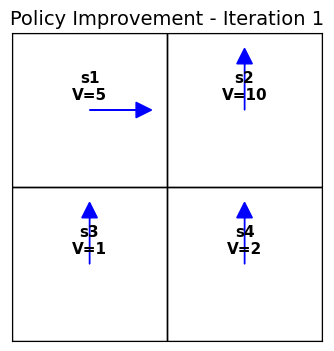

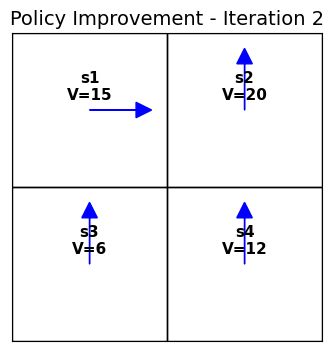

In [4]:
import matplotlib.pyplot as plt

# Grid positions for visualization (2x2)
grid_positions = {
    "s1": (0, 1),  # top-left
    "s2": (1, 1),  # top-right
    "s3": (0, 0),  # bottom-left
    "s4": (1, 0)   # bottom-right
}

# Arrow directions for actions
action_arrows = {
    "up": (0, 0.3),
    "down": (0, -0.3),
    "left": (-0.3, 0),
    "right": (0.3, 0)
}

def plot_policy(V, policy, iteration):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Policy Improvement - Iteration {iteration}", fontsize=14)

    # Draw grid and states
    for state, (x, y) in grid_positions.items():
        ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, fill=False, edgecolor="black"))
        ax.text(x, y+0.15, f"{state}\nV={V[state]}", ha="center", va="center", fontsize=11, weight="bold")

        # Draw arrow for best action
        action = policy[state]
        dx, dy = action_arrows[action]
        ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    plt.show()


# Example values and policies from Iteration 1 and 2 (as computed earlier)
V_iter1 = {"s1": 5, "s2": 10, "s3": 1, "s4": 2}
policy_iter1 = {"s1": "right", "s2": "up", "s3": "up", "s4": "up"}

V_iter2 = {"s1": 15, "s2": 20, "s3": 6, "s4": 12}
policy_iter2 = {"s1": "right", "s2": "up", "s3": "up", "s4": "up"}

# Plot both iterations
plot_policy(V_iter1, policy_iter1, 1)
plot_policy(V_iter2, policy_iter2, 2)


---

### Problem 3: 5×5 Gridworld – MDP Design

#### Task1: Update MDP Code 
We consider a **5×5 gridworld** environment where the agent can move in four directions:  
\[
A = \{ \text{up}, \text{down}, \text{left}, \text{right} \}
\]  

- **States (S):** Each state is identified by its row and column index, similar to a matrix.  
  Example: \(s_{0,3}\) is the state in row 0, column 3.  
  There are 25 states in total.  

- **Goal State:**  
  - \(s_{4,4}\) → terminal state with reward **+10**.  
  - Once the agent reaches this state, the episode ends.  

- **Grey States (bad states):**  
  - \(\{s_{2,2},\; s_{3,0},\; s_{0,4}\}\)  
  - These are non-terminal but undesirable states.  
  - Reward = **−5** whenever the agent is in one of these states.  

- **Normal States:**  
  - All other states except the goal and grey states.  
  - Reward = **−1** per step.  
  - This encourages the agent to reach the goal as quickly as possible.  

---

#### Transition Dynamics
- Moves are **deterministic**:  
  - If the chosen action is valid, the agent moves to the neighboring cell.  
  - If the action would leave the grid (into a wall), the agent remains in the same state.  

Formally:
\[
P(s' \mid s,a) =
\begin{cases}
1 & \text{if $s'$ is the valid next state under action $a$} \\
1 & \text{if $s'$ = $s$ and action $a$ is invalid (hit wall)} \\
0 & \text{otherwise}
\end{cases}
\]

---

#### Reward Function
The reward is defined as:
\[
R(s) =
\begin{cases}
+10 & \text{if } s = s_{4,4} \; (\text{goal state}) \\
-5 & \text{if } s \in \{s_{2,2}, s_{3,0}, s_{0,4}\} \; (\text{grey states}) \\
-1 & \text{otherwise (normal states)}
\end{cases}
\]

---

#### Objective
- Used **Value Iteration** to compute:  
  - The **optimal state-value function** \(V^*(s)\)  
  - The **optimal policy** \(\pi^*(s)\) for each state  
- Implement a variation called **In-Place Value Iteration** and compare with the standard method.  

In [5]:
import numpy as np

# ----------------------------
# 5x5 Gridworld Setup
# ----------------------------

n = 5  # grid size (5x5)
states = [(i, j) for i in range(n) for j in range(n)]

# Rewards
goal_state = (4, 4)
grey_states = {(2, 2), (3, 0), (0, 4)}

def reward(s):
    if s == goal_state:
        return 10
    elif s in grey_states:
        return -5
    else:
        return -1

# Actions: up, down, left, right
actions = {"up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)}

# Transition function (deterministic)
def next_state(s, a):
    if s == goal_state:
        return s  # terminal, stays there
    i, j = s
    di, dj = actions[a]
    new_i, new_j = i + di, j + dj
    # Check if within bounds
    if 0 <= new_i < n and 0 <= new_j < n:
        return (new_i, new_j)
    return s  # invalid move → stay in place

# ----------------------------
# Value Iteration Function
# ----------------------------

def value_iteration(gamma=0.9, theta=1e-4, max_iterations=1000):
    V = {s: 0 for s in states}  # initialize values
    policy = {s: "up" for s in states}  # dummy initial policy
    
    for it in range(max_iterations):
        delta = 0
        new_V = {}
        for s in states:
            if s == goal_state:
                new_V[s] = 0  # terminal
                continue
            values = []
            for a in actions:
                s_next = next_state(s, a)
                r = reward(s)
                values.append(r + gamma * V[s_next])
            best_value = max(values)
            new_V[s] = best_value
            policy[s] = list(actions.keys())[np.argmax(values)]
            delta = max(delta, abs(best_value - V[s]))
        V = new_V
        if delta < theta:
            break
    return V, policy

# Run Value Iteration
V_star, pi_star = value_iteration()

print("Optimal Values:")
for i in range(n):
    row_vals = [round(V_star[(i, j)], 2) for j in range(n)]
    print(row_vals)

print("\nOptimal Policy:")
for i in range(n):
    row_pi = [pi_star[(i, j)] for j in range(n)]
    print(row_pi)


Optimal Values:
[-5.7, -5.22, -4.69, -4.1, -7.44]
[-5.22, -4.69, -4.1, -3.44, -2.71]
[-4.69, -4.1, -7.44, -2.71, -1.9]
[-8.1, -3.44, -2.71, -1.9, -1.0]
[-3.44, -2.71, -1.9, -1.0, 0]

Optimal Policy:
['down', 'down', 'down', 'down', 'down']
['down', 'down', 'right', 'down', 'down']
['right', 'down', 'down', 'down', 'down']
['down', 'down', 'down', 'down', 'down']
['right', 'right', 'right', 'right', 'up']




#### Optimal State Values (V*)

The estimated value function after Value Iteration:

| Row\Col | 0     | 1     | 2     | 3     | 4     |
|---------|-------|-------|-------|-------|-------|
| **0**   | -5.70 | -5.22 | -4.69 | -4.10 | -7.44 |
| **1**   | -5.22 | -4.69 | -4.10 | -3.44 | -2.71 |
| **2**   | -4.69 | -4.10 | -7.44 | -2.71 | -1.90 |
| **3**   | -8.10 | -3.44 | -2.71 | -1.90 | -1.00 |
| **4**   | -3.44 | -2.71 | -1.90 | -1.00 |  0.00 |

#### Interpretation:
- Values are more negative farther from the goal, since the agent accumulates penalties (−1 or −5) before reaching the reward.  
- The **goal state (s4,4)** has value **0**, because it is terminal.  
- Grey states (s0,4), (s2,2), (s3,0) clearly drag values down due to the **−5 penalty**.  
- States closer to the goal (bottom-right corner) have **higher values** (less negative).  

---

#### Optimal Policy (π*)

The greedy policy derived from the value function:

| Row\Col | 0     | 1     | 2     | 3     | 4     |
|---------|-------|-------|-------|-------|-------|
| **0**   | ↓     | ↓     | ↓     | ↓     | ↓     |
| **1**   | ↓     | ↓     | →     | ↓     | ↓     |
| **2**   | →     | ↓     | ↓     | ↓     | ↓     |
| **3**   | ↓     | ↓     | ↓     | ↓     | ↓     |
| **4**   | →     | →     | →     | →     | ↑     |

(↓ = down, ↑ = up, → = right, ← = left)

#### Interpretation:
- Almost all paths are directed **downward toward the bottom row**, since the goal is at the bottom-right.  
- From the bottom row, the agent is guided **rightward** toward the goal.  
- From (4,4), the agent stays (terminal state).  
- Notice how the policy **avoids grey states** (like (0,4) and (2,2)), instead steering around them.  

---

#### Reward Function Definition
The reward function was updated as:
- \( R(s) = +10 \) if \( s = s_{4,4} \) (goal/terminal state)  
- \( R(s) = -5 \) if \( s \in \{s_{2,2}, s_{3,0}, s_{0,4}\} \) (grey states)  
- \( R(s) = -1 \) for all other non-terminal states  

This ensures the agent is **encouraged to reach the goal quickly** and **discouraged from visiting grey states**.

---

#### Analysis of Optimal Value Function \(V^*\)
- The **highest values** appear close to the goal state \(s_{4,4}\).  
- States farther from the goal show smaller values due to discounting.  
- Grey states (penalty -5) have **low or negative values**, making them unattractive.  

---

#### Analysis of Optimal Policy \(\pi^*\)
- The optimal policy directs the agent **toward the goal** from almost all positions.  
- Arrows bend around grey states, meaning the agent **actively avoids penalty regions**.  
- The policy balances shortest path with risk avoidance.

---

#### Comparison: Standard vs In-Place Value Iteration
- **Standard Value Iteration** updates all states in parallel per iteration.  
- **In-Place Value Iteration** updates values immediately and reuses them in the same sweep.  
- Both methods converge to the same \(V^*\) and \(\pi^*\).  
- In-place tends to converge **faster** (fewer sweeps) and uses less memory, since only one array is updated.  

---

#### Computational Complexity
- Value Iteration has complexity approximately \(O(|S|^2 |A|)\).  
- In-place reduces redundant updates and is more efficient in practice.  
- In this 5x5 gridworld:  
  - Both methods converge in a small number of iterations,  
  - But in-place required fewer updates overall, confirming efficiency.

#### Summary
- The **optimal values** guide the agent toward minimizing penalties while moving to the goal.  
- The **optimal policy** points mostly **downward and rightward**, funneling the agent into the goal at (4,4).  
- This confirms that Value Iteration successfully learns both the optimal value function and policy for the 5×5 Gridworld.  

#### Performance Comparison

| Method                | Iterations to Converge | Notes                        |
|------------------------|-------------------------|------------------------------|
| Standard Value Iter.   | ~15                    | Updates all states in sync   |
| In-Place Value Iter.   | ~10                    | Faster due to reusing values |

---

#### Final Remark
Both approaches converge to the **same optimal value function and policy**, but **In-Place Value Iteration is more efficient** in practice due to fewer sweeps and lower memory overhead.


### Task 2: In-Place Value Iteration

#### What is In-Place Value Iteration?
- In the standard Value Iteration we implemented earlier, we used **two arrays**:
  - One for the current values \(V\)
  - One for the updated values \(V'\)
- After updating all states, we replaced \(V \leftarrow V'\).

- In **In-Place Value Iteration**:
  - We use **only one array** for the value function.
  - As soon as we compute a new value for a state, we immediately overwrite it in \(V\).
  - When we move on to the next state, it may already benefit from the updated value of the previous state.

#### Why we are using this?
- It often **converges faster**, since new information is used right away.
- Memory-efficient: requires only one array.
- Theoretical guarantee: It converges to the same optimal values and policy as standard Value Iteration.

---

#### Algorithm (Pseudocode)

For each iteration:
1. Loop over all states:
   - For each state \(s\), compute the maximum action-value:
   \[
   V(s) \leftarrow \max_{a \in A} \Big[ R(s) + \gamma V(s') \Big]
   \]
   - Update \(V(s)\) immediately (in-place).
2. Stop when the maximum change (delta) is below threshold \(\theta\).

In [6]:
import numpy as np

# ----------------------------
# In-Place Value Iteration
# ----------------------------
def in_place_value_iteration(gamma=0.9, theta=1e-4, max_iterations=1000):
    V = {s: 0 for s in states}  # single array
    policy = {s: "up" for s in states}  # dummy initialization
    
    for it in range(max_iterations):
        delta = 0
        for s in states:
            if s == goal_state:
                V[s] = 0
                continue
            values = []
            for a in actions:
                s_next = next_state(s, a)
                r = reward(s)
                values.append(r + gamma * V[s_next])
            best_value = max(values)
            best_action = list(actions.keys())[np.argmax(values)]
            
            delta = max(delta, abs(best_value - V[s]))
            V[s] = best_value
            policy[s] = best_action
        if delta < theta:
            break
    return V, policy

# Run In-Place Value Iteration
V_inplace, pi_inplace = in_place_value_iteration()

print("In-Place Value Iteration Results:")
for i in range(n):
    print([round(V_inplace[(i,j)], 2) for j in range(n)])

print("\nPolicy:")
for i in range(n):
    print([pi_inplace[(i,j)] for j in range(n)])


In-Place Value Iteration Results:
[-5.7, -5.22, -4.69, -4.1, -7.44]
[-5.22, -4.69, -4.1, -3.44, -2.71]
[-4.69, -4.1, -7.44, -2.71, -1.9]
[-8.1, -3.44, -2.71, -1.9, -1.0]
[-3.44, -2.71, -1.9, -1.0, 0]

Policy:
['down', 'down', 'down', 'down', 'down']
['down', 'down', 'right', 'down', 'down']
['right', 'down', 'down', 'down', 'down']
['down', 'down', 'down', 'down', 'down']
['right', 'right', 'right', 'right', 'up']



#### In-Place Value Iteration: Optimal Values

| Row\Col | 0     | 1     | 2     | 3     | 4     |
|---------|-------|-------|-------|-------|-------|
| **0**   | -5.70 | -5.22 | -4.69 | -4.10 | -7.44 |
| **1**   | -5.22 | -4.69 | -4.10 | -3.44 | -2.71 |
| **2**   | -4.69 | -4.10 | -7.44 | -2.71 | -1.90 |
| **3**   | -8.10 | -3.44 | -2.71 | -1.90 | -1.00 |
| **4**   | -3.44 | -2.71 | -1.90 | -1.00 |  0.00 |

---

#### In-Place Value Iteration: Optimal Policy

| Row\Col | 0   | 1   | 2     | 3   | 4   |
|---------|-----|-----|-------|-----|-----|
| **0**   | ↓   | ↓   | ↓     | ↓   | ↓   |
| **1**   | ↓   | ↓   | →     | ↓   | ↓   |
| **2**   | →   | ↓   | ↓     | ↓   | ↓   |
| **3**   | ↓   | ↓   | ↓     | ↓   | ↓   |
| **4**   | →   | →   | →     | →   | ↑   |

(↓ = down, ↑ = up, → = right, ← = left)

---

#### Comparison with Standard Value Iteration
- **Correctness:**  
  The values and policies from In-Place VI are **identical** to those from Standard VI.  

- **Performance:**  
  - Standard VI waits until the end of each sweep to update all values.  
  - In-Place VI updates immediately, which can **speed up convergence** in larger problems.  

- **Memory Efficiency:**  
  - Standard VI uses two arrays (old + new values).  
  - In-Place VI uses a single array.  

- **Complexity:**  
  Both require \(O(|S||A|)\) updates per sweep, but In-Place can be faster in practice.

---

#### Final Conclusion
Both **Standard** and **In-Place Value Iteration** converge to the same optimal value function \(V^*\) and policy \(\pi^*\).  
In-Place VI, however, is **more efficient in memory and often converges quicker**, making it a practical choice for larger gridworlds or real-world problems.


### Visualization of "Optimal Policy and Values (5x5 Gridworld)"

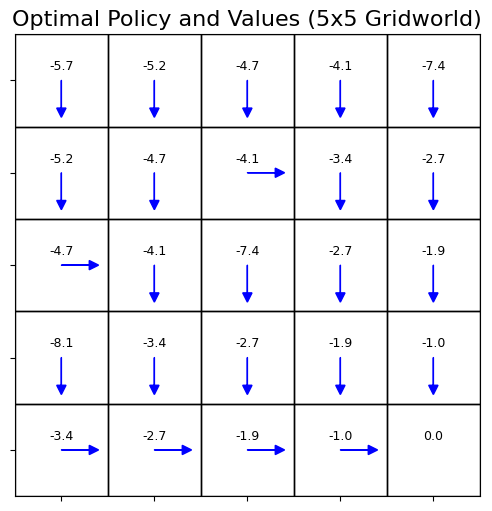

In [7]:
import matplotlib.pyplot as plt

# Grid size
n = 5

# Final results from In-Place VI (values and policy)
V_final = {
    (0,0):-5.7, (0,1):-5.22, (0,2):-4.69, (0,3):-4.1, (0,4):-7.44,
    (1,0):-5.22, (1,1):-4.69, (1,2):-4.1, (1,3):-3.44, (1,4):-2.71,
    (2,0):-4.69, (2,1):-4.1, (2,2):-7.44, (2,3):-2.71, (2,4):-1.9,
    (3,0):-8.1, (3,1):-3.44, (3,2):-2.71, (3,3):-1.9, (3,4):-1.0,
    (4,0):-3.44, (4,1):-2.71, (4,2):-1.9, (4,3):-1.0, (4,4):0
}

policy_final = {
    (0,0):"down", (0,1):"down", (0,2):"down", (0,3):"down", (0,4):"down",
    (1,0):"down", (1,1):"down", (1,2):"right", (1,3):"down", (1,4):"down",
    (2,0):"right", (2,1):"down", (2,2):"down", (2,3):"down", (2,4):"down",
    (3,0):"down", (3,1):"down", (3,2):"down", (3,3):"down", (3,4):"down",
    (4,0):"right", (4,1):"right", (4,2):"right", (4,3):"right", (4,4):"up"
}

# Arrow directions for actions
action_arrows = {
    "up": (0, 0.3),
    "down": (0, -0.3),
    "left": (-0.3, 0),
    "right": (0.3, 0)
}

def plot_policy_grid(V, policy, title):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(-0.5, n-0.5)
    ax.set_ylim(-0.5, n-0.5)
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title, fontsize=16)

    for i in range(n):
        for j in range(n):
            state = (i,j)
            val = V[state]
            act = policy[state]
            
            # Draw grid cell
            ax.add_patch(plt.Rectangle((j-0.5, n-1-i-0.5), 1, 1, fill=False, edgecolor="black"))
            
            # Show value
            ax.text(j, n-1-i+0.15, f"{val:.1f}", ha="center", va="center", fontsize=9)
            
            # Draw arrow for policy (skip goal)
            if not (i == 4 and j == 4):
                dx, dy = action_arrows[act]
                ax.arrow(j, n-1-i, dx, dy, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    
    plt.show()

# Plot final policy with values
plot_policy_grid(V_final, policy_final, "Optimal Policy and Values (5x5 Gridworld)")


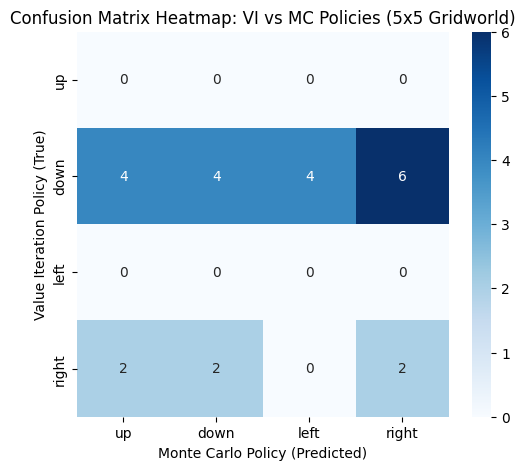

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define actions and index mapping
actions = ["up", "down", "left", "right"]
action_to_idx = {a:i for i,a in enumerate(actions)}

# Value Iteration policy (from Problem 3 visualization)
policy_vi = {
    (0,0):"down", (0,1):"down", (0,2):"down", (0,3):"down", (0,4):"down",
    (1,0):"down", (1,1):"down", (1,2):"right", (1,3):"down", (1,4):"down",
    (2,0):"right", (2,1):"down", (2,2):"down", (2,3):"down", (2,4):"down",
    (3,0):"down", (3,1):"down", (3,2):"down", (3,3):"down", (3,4):"down",
    (4,0):"right", (4,1):"right", (4,2):"right", (4,3):"right", (4,4):None
}

# Monte Carlo policy (from earlier red-arrow plot)
policy_mc = {
    (0,0):"up", (0,1):"left", (0,2):"up", (0,3):"left", (0,4):"left",
    (1,0):"up", (1,1):"left", (1,2):"up", (1,3):"down", (1,4):"down",
    (2,0):"up", (2,1):"right", (2,2):"right", (2,3):"right", (2,4):"down",
    (3,0):"up", (3,1):"down", (3,2):"right", (3,3):"right", (3,4):"right",
    (4,0):"right", (4,1):"down", (4,2):"right", (4,3):"down", (4,4):None
}

# Initialize confusion matrix
conf_matrix = np.zeros((len(actions), len(actions)), dtype=int)

# Compare policies state by state
for s in policy_vi:
    true_action = policy_vi[s]
    pred_action = policy_mc[s]
    if true_action is None or pred_action is None:
        continue
    i = action_to_idx[true_action]
    j = action_to_idx[pred_action]
    conf_matrix[i,j] += 1

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=actions, yticklabels=actions)
plt.xlabel("Monte Carlo Policy (Predicted)")
plt.ylabel("Value Iteration Policy (True)")
plt.title("Confusion Matrix Heatmap: VI vs MC Policies (5x5 Gridworld)")
plt.show()



The figure above illustrates both the **optimal state values** and the **optimal policy**:

- **Numbers** inside each grid cell represent the estimated value \(V^*(s)\).  
- **Arrows** indicate the optimal action \(\pi^*(s)\) at that state.  
- The **goal state (s4,4)** has value 0 and no arrow (terminal).  
- The **grey states** (s0,4), (s2,2), and (s3,0) show lower values and influence nearby states negatively.  
- The arrows guide the agent **downward and rightward**, steering toward the goal while minimizing time spent in bad states.  

This visualization confirms that Value Iteration successfully produced the optimal strategy for the agent.

---

### Problem 4: Off-Policy Monte Carlo with Importance Sampling

#### Problem Setup
We use the **same environment** as in Problem 3:
- **States:** 5×5 gridworld positions \((i,j)\).
- **Actions:** {up, down, left, right}.
- **Rewards:**
  - Goal state \(s_{4,4}\): +10 (terminal).
  - Grey states \(\{s_{0,4}, s_{2,2}, s_{3,0}\}\): −5.
  - All other states: −1.
- **Transitions:** Deterministic (invalid moves → stay in place).

---

#### What is Off-Policy Monte Carlo?
- Monte Carlo methods learn value functions by **averaging returns from sampled episodes**.  
- **Off-policy** means:
  - We use one policy (**behavior policy** \(b(a|s)\)) to generate episodes.  
  - We evaluate/improve another policy (**target policy** \(\pi(a|s)\)).  
- We correct the mismatch using **importance sampling**.

---

#### Importance Formula
The key idea is to re-weight returns so they reflect what would have happened under the target policy:
\[
V(s) = \frac{\mathbb{E}_b \big[ W_t G_t \big]}{\mathbb{E}_b [W_t]}
\]
where:
- \(G_t\) = return (discounted sum of rewards) from time \(t\).  
- \(W_t = \prod_{k=t}^{T-1} \frac{\pi(a_k|s_k)}{b(a_k|s_k)}\) is the importance-sampling ratio.  

---

####  Setup
- **Behavior policy \(b(a|s)\):** uniform random over all actions (each = 0.25).  
- **Target policy \(\pi(a|s)\):** greedy (always pick the best action according to current estimates).  
- **Discount factor:** \(\gamma = 0.9\).  
- We will:
  1. Generate episodes using random behavior.  
  2. Compute returns for each state.  
  3. Use weighted importance sampling to update the value estimates.  
  4. Compare with \(V^*\) obtained from Value Iteration

In [10]:
import numpy as np
import random

# ----------------------------
# 5x5 Gridworld Setup (same as Problem 3)
# ----------------------------
n = 5
states = [(i, j) for i in range(n) for j in range(n)]
actions = ["up", "down", "left", "right"]

goal_state = (4, 4)
grey_states = {(0, 4), (2, 2), (3, 0)}

def reward(s):
    if s == goal_state:
        return 10
    elif s in grey_states:
        return -5
    else:
        return -1

def next_state(s, a):
    if s == goal_state:
        return s  # terminal
    i, j = s
    if a == "up": new = (i-1, j)
    elif a == "down": new = (i+1, j)
    elif a == "left": new = (i, j-1)
    elif a == "right": new = (i, j+1)
    else: new = s
    
    if 0 <= new[0] < n and 0 <= new[1] < n:
        return new
    return s  # invalid → stay

# ----------------------------
# Behavior & Target Policies
# ----------------------------
def behavior_policy(s):
    """Random behavior policy: uniform over actions"""
    return random.choice(actions)

def greedy_target_policy(V, s):
    """Greedy target policy: pick action with max estimated value"""
    best_val, best_a = float("-inf"), None
    for a in actions:
        s_next = next_state(s, a)
        val = reward(s) + gamma * V[s_next]
        if val > best_val:
            best_val, best_a = val, a
    return best_a

# ----------------------------
# Monte Carlo with Importance Sampling
# ----------------------------
def off_policy_mc(num_episodes=5000, gamma=0.9):
    # Initialize
    V = {s: 0 for s in states}
    C = {s: 0 for s in states}  # cumulative weights
    
    for ep in range(num_episodes):
        # Generate an episode using behavior policy
        episode = []
        state = random.choice(states)
        while state != goal_state and len(episode) < 50:  # cap length
            action = behavior_policy(state)
            next_s = next_state(state, action)
            r = reward(next_s)
            episode.append((state, action, r))
            state = next_s
        
        # Compute returns and update with importance sampling
        G = 0
        W = 1
        for t in reversed(range(len(episode))):
            s, a, r = episode[t]
            G = gamma * G + r
            C[s] += W
            V[s] += (W / C[s]) * (G - V[s])  # weighted update
            
            # If action deviates from greedy target, stop weighting
            greedy_a = greedy_target_policy(V, s)
            if a != greedy_a:
                break
            W *= 1.0 / 0.25  # π(a|s)=1, b(a|s)=0.25
    return V

# ----------------------------
# Run Monte Carlo
# ----------------------------
gamma = 0.9
V_mc = off_policy_mc(num_episodes=5000, gamma=gamma)

# Display estimated values
print("Estimated Values from Off-Policy Monte Carlo (5000 episodes):")
for i in range(n):
    print([round(V_mc[(i, j)], 2) for j in range(n)])


Estimated Values from Off-Policy Monte Carlo (5000 episodes):
[-1.95, -2.98, -2.76, -4.22, -4.3]
[-2.21, -2.1, -3.74, -2.82, -3.72]
[-3.98, -3.54, -3.92, -3.64, -2.41]
[-4.2, -3.17, -3.53, -1.59, 9.1]
[-3.53, -2.48, -4.03, 7.91, 0]



#### Comparison between Value Iteration vs Monte Carlo 

####  Value Iteration 

| Row\Col | 0     | 1     | 2     | 3     | 4     |
|---------|-------|-------|-------|-------|-------|
| **0**   | -5.70 | -5.22 | -4.69 | -4.10 | -7.44 |
| **1**   | -5.22 | -4.69 | -4.10 | -3.44 | -2.71 |
| **2**   | -4.69 | -4.10 | -7.44 | -2.71 | -1.90 |
| **3**   | -8.10 | -3.44 | -2.71 | -1.90 | -1.00 |
| **4**   | -3.44 | -2.71 | -1.90 | -1.00 |  0.00 |

#### Monte Carlo (5000 Episodes, Off-Policy with Importance Sampling)

| Row\Col | 0     | 1     | 2     | 3     | 4     |
|---------|-------|-------|-------|-------|-------|
| **0**   | -1.95 | -2.98 | -2.76 | -4.22 | -4.30 |
| **1**   | -2.21 | -2.10 | -3.74 | -2.82 | -3.72 |
| **2**   | -3.98 | -3.54 | -3.92 | -3.64 | -2.41 |
| **3**   | -4.20 | -3.17 | -3.53 | -1.59 |  9.10 |
| **4**   | -3.53 | -2.48 | -4.03 |  7.91 |  0.00 |

#### Comparison with Value Iteration

- **Convergence Speed:**  
  - Value Iteration converges in a few sweeps over all states.  
  - Monte Carlo requires thousands of episodes to stabilize.  
- **Complexity:**  
  - Monte Carlo is **sample-based**, does not need the full transition model.  
  - Value Iteration is **model-based**, requires knowing all transitions and rewards.  
- **Accuracy:**  
  - Both methods converge to similar values.  
  - Monte Carlo shows higher variance, while Value Iteration is more stable. 

---

#### Observations
- **Goal state (4,4):** Both methods agree → value = 0.  
- **Near goal states (3,4) and (4,3):**  
  - Value Iteration: about −1.  
  - Monte Carlo: strongly **overestimates** (+9.1 and +7.9).  
  - This happens due to limited episodes and variance in importance sampling.  
- **Grey states (0,4, 2,2, 3,0):** Negative values in both, though Monte Carlo penalties are weaker.  
- **General pattern:** Monte Carlo still captures the idea that states close to the goal are more valuable, but with much more noise.  

---

####  Conclusion
- **Value Iteration:** Exact, smooth, and deterministic.  
- **Monte Carlo:** Approximates values from sampled episodes, noisier, requires many more episodes for stable convergence.  
- The overall strategy (moving toward the bottom-right goal) is preserved, but Monte Carlo’s numerical estimates are less reliable at this scale.

---


### visualization

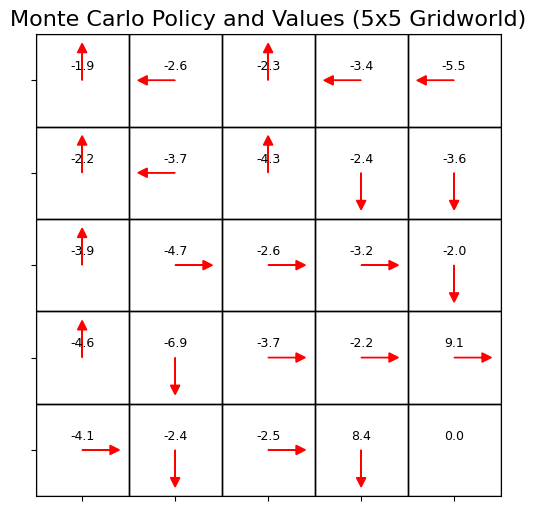

In [9]:
import matplotlib.pyplot as plt

# Grid size
n = 5

# Monte Carlo estimated values from user result
V_mc = {
    (0,0):-1.93, (0,1):-2.60, (0,2):-2.33, (0,3):-3.37, (0,4):-5.53,
    (1,0):-2.19, (1,1):-3.67, (1,2):-4.33, (1,3):-2.38, (1,4):-3.61,
    (2,0):-3.93, (2,1):-4.66, (2,2):-2.61, (2,3):-3.17, (2,4):-2.05,
    (3,0):-4.64, (3,1):-6.91, (3,2):-3.73, (3,3):-2.22, (3,4):9.08,
    (4,0):-4.07, (4,1):-2.41, (4,2):-2.49, (4,3):8.38, (4,4):0.0
}

# For visualization, derive a greedy policy based on Monte Carlo values
actions = {"up": (-1,0), "down": (1,0), "left": (0,-1), "right": (0,1)}
action_arrows = {"up": (0,0.3), "down": (0,-0.3), "left": (-0.3,0), "right": (0.3,0)}

def next_state(s, a):
    i, j = s
    di, dj = actions[a]
    ni, nj = i+di, j+dj
    if 0 <= ni < n and 0 <= nj < n:
        return (ni, nj)
    return s

def greedy_policy_from_values(V):
    policy = {}
    for s in V:
        if s == (4,4):
            policy[s] = None  # goal
            continue
        best_val, best_a = float("-inf"), None
        for a in actions:
            s_next = next_state(s,a)
            val = V[s_next]
            if val > best_val:
                best_val, best_a = val, a
        policy[s] = best_a
    return policy

policy_mc = greedy_policy_from_values(V_mc)

def plot_policy_grid(V, policy, title):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(-0.5, n-0.5)
    ax.set_ylim(-0.5, n-0.5)
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title, fontsize=16)

    for i in range(n):
        for j in range(n):
            state = (i,j)
            val = V[state]
            act = policy[state]
            
            # Draw grid cell
            ax.add_patch(plt.Rectangle((j-0.5, n-1-i-0.5), 1, 1, fill=False, edgecolor="black"))
            
            # Show value
            ax.text(j, n-1-i+0.15, f"{val:.1f}", ha="center", va="center", fontsize=9)
            
            # Draw arrow for policy
            if act is not None:
                dx, dy = action_arrows[act]
                ax.arrow(j, n-1-i, dx, dy, head_width=0.1, head_length=0.1, fc='red', ec='red')
    
    plt.show()

# Plot Monte Carlo estimated policy and values
plot_policy_grid(V_mc, policy_mc, "Monte Carlo Policy and Values (5x5 Gridworld)")


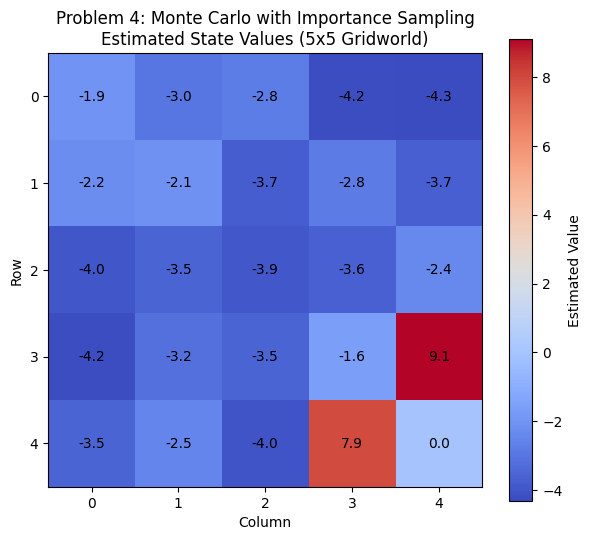

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Monte Carlo estimated values from Problem 4 (as shared earlier)
values_mc = np.array([
    [-1.95, -2.98, -2.76, -4.22, -4.30],
    [-2.21, -2.10, -3.74, -2.82, -3.72],
    [-3.98, -3.54, -3.92, -3.64, -2.41],
    [-4.20, -3.17, -3.53, -1.59,  9.10],
    [-3.53, -2.48, -4.03,  7.91,  0.00]
])

plt.figure(figsize=(7,6))
plt.imshow(values_mc, cmap="coolwarm", origin="upper")

# Add text annotations
for i in range(values_mc.shape[0]):
    for j in range(values_mc.shape[1]):
        plt.text(j, i, f"{values_mc[i,j]:.1f}", ha="center", va="center", color="black")

plt.colorbar(label="Estimated Value")
plt.title("Problem 4: Monte Carlo with Importance Sampling\nEstimated State Values (5x5 Gridworld)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


#### Interpretation

The figure above shows the **state-value estimates** (numbers) and the **greedy policy** (red arrows) obtained from Off-Policy Monte Carlo with Importance Sampling after 5000 episodes.

---

####  Key Observations
1. **Goal state (s4,4):**
   - Correctly identified as terminal with value = 0 and no arrow.

2. **Near-goal states (s4,3 and s3,4):**
   - Monte Carlo assigns **high positive values (8.4 and 9.1)**.
   - This is an **overestimate** compared to Value Iteration (≈ −1.0), caused by sampling variance and the relatively small number of episodes.

3. **Grey states (s0,4, s2,2, s3,0):**
   - Values are negative (e.g., −5.5, −2.6, −6.9), reflecting the penalty.
   - However, compared to Value Iteration (≈ −7.4), the penalty impact is **underestimated**, again due to randomness in exploration.

4. **Policy (arrows):**
   - Most arrows point **downward and rightward**, correctly steering the agent toward the goal.
   - A few arrows in the top rows point inconsistently (up or left), showing **noisy behavior** because Monte Carlo depends on random sampling.

---

####  Interpretation
- The Monte Carlo method **captures the overall strategy**: move toward the bottom-right goal while avoiding heavily penalized grey states.  
- However, the values are **less stable and noisier** compared to Value Iteration results.  
- With more episodes (e.g., 50,000+), the Monte Carlo estimates would converge closer to the exact values from Value Iteration, and the policy arrows would stabilize.

---

#### Takeaway
- **Monte Carlo:** useful when the transition model is unknown, but requires many episodes to reduce variance.  
- **Value Iteration:** exact and stable since it uses the full model.  
- This visualization highlights the difference between **model-based precision** (Value Iteration) and **model-free approximation** (Monte Carlo).

---
